**bold text**## فصل سوم

## 3-Creating layers and model



## شناسایی اعداد دست نویس
## Mnist_FullyConnected

In [ ]:
## دیتاست مربوط به دست نویس
from keras.datasets import mnist
(train_images,train_labels) ,(test_images,test_labels)= mnist.load_data()
print("tarin:",train_images.shape,"test_images:",test_images.shape)

11501568/11490434 [==============================] - 0s 0us/step
tarin: (60000, 28, 28) test_images: (10000, 28, 28)


## اگر بخواهیم دسترسی محلی داشته باشیم ابتدا دیتاست را در گوگل درایو اپلود کرده و با 


دستورات زیر فراخاونی می کنیم

In [ ]:
from google.colab import drive
drive.mount('/content/drive')     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
data=np.load('/content/drive/My Drive/Colab Notebooks/Keras/mnist.npz')

In [ ]:
def plot_history(net_history):
  history = net_history.history# برای ساخت دیکشنری
  
  accuracy =history ['accuracy']
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(accuracy)
  if len(history.keys()) > 2 :
    accuracy_val =history ['val_accuracy']
    plt.plot(accuracy_val)
    plt.legend('accuracy', 'val_accuracy')
  plt.figure()

  losses =history['loss']
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(losses)
  if len(history.keys()) > 2 :
    losses_val =history['val_loss']
    plt.plot(losses_val)
    plt.legend('Loss', 'val_loss')



In [ ]:
train_images,train_labels=data['x_train'],np.array(data['y_train'])
test_images,test_labels=data['x_test'],np.array(data['y_test'])
print("tarin:",train_images.shape,"test_images:",test_images.shape)

tarin: (60000, 28, 28) test_images: (10000, 28, 28)


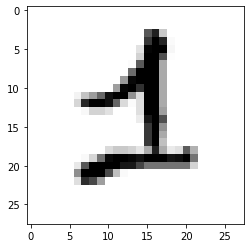

In [ ]:
digit = train_images[24]
plt.imshow(digit , cmap= 'binary')

#Tasks:
برای آماده سازی داده ها برای یک مدل  فولی کانکتت باید یک سری تغییرات بر روی داده ها به شرح زیر اناجام بدیم
1- داده ها به صورت عکس 28*28 هستند که این عکس را بیاد تبدیل کنیم به یک ردیف از تبدیل داده های عکس به بردار  
2-نرمالیزه کردن داده های عکس (بین صفر و یک)  
حال داده ها اماده است برای ورود به فولس کانکتت

## آخ آخ چقدر قسمت پیش پردازش تصاویر راحت هستش در پردازش متن پوست برنامه نویس کنده میشه :))))

In [ ]:
# X_train=train_images.reshape(60000,784) # دستور ریشیپ ابعاد را برای ساخت بردار تعریف می کنسم
X_train=train_images.reshape(train_images.shape[0],(train_images.shape[1]*train_images.shape[2]))
X_train.shape

(60000, 784)

In [ ]:
# X_test=test_images.reshape(10000,784) # دستور ریشیپ ابعاد را برای ساخت بردار تعریف می کنسم
X_test=test_images.reshape(test_images.shape[0],(test_images.shape[1]*test_images.shape[2]))
X_test.shape

(10000, 784)

In [ ]:
#image = image /255 # مرسوم این است که مقادیر پیکسل تصاویر را بین 0 و 1 کنیم لدا اگر 255 بیشترین مقدار پیکسل هست همه را تقسیم بر 255 بکنیم و اگر بیشترین مقدار پیکسل را نمی دانیم ازکتابخانه نامپای استفاده می کنتیم # برای نرمالیزه کردن حتما باید از حالت اینتیجر به فلوت تغییر بدهیم و گرنه ارور دریافت می کنیم
# می خواهیم تایپ های تصاویر را هم مانند هم کنیم مثلا اگر بعضی انوع اینتجر و یا فلوت باشند همه را فلوت می کنیم
X_train=X_train.astype('float32') #(np.float32)
X_test=X_test.astype('float32') #(np.float32)
X_train=X_train/np.max(X_train)#X_train /=255
X_test=X_test/np.max(X_test)#X_test /=255

In [ ]:
print('max_train:',np.max(X_train),'min_train:',np.min(X_train))
print('max_test:',np.max(X_test),'min_test:',np.min(X_test))

max_train: 1.0 min_train: 0.0
max_test: 1.0 min_test: 0.0


In [ ]:
print('train_labels: ',train_labels.shape[0],np.unique(train_labels))
print('test_labels: ',test_labels.shape[0],np.unique(test_labels))

train_labels:  60000 [0 1 2 3 4 5 6 7 8 9]
test_labels:  10000 [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# داده های لیبل باید از حالت لیبل به حالت وان هات باید تبدیل کنیم برای استفاده در مدل ایجاد شده چون نمی توان خود عدد را مستقیم وارد مدل کرد 
from keras.utils import np_utils# از این کتابخانه برای تبدیل لیبل ها استفاده می کنبم
Y_train = np_utils.to_categorical(train_labels)
Y_test = np_utils.to_categorical(test_labels)
print('train_labels[2]:',train_labels[2],'\n','Y_train[2]:',Y_train[2],'\n','\n')
print('test_labels[2]:','\n',test_labels[2],'Y_test[2]:',Y_test[2])
# حال می توان خروجی مدل را با این مقایسه کرد

train_labels[2]: 4 
 Y_train[2]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
 

test_labels[2]: 
 1 Y_test[2]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


##==============================================================================
## پایان مرحله آماده سازی داده و شروع ساخت مدل

ما یک مدل فولی کانکت فراهم می کنیم که ورودیش ایکس ترین باشد و با لیبل های ترین آموزش می بیند
و دست آخر با داده های تست مورد ارزیابی قرار می گیرد
یعنی ورودی ما داری 784 نورن می باشد ما می خواهیم در لایه بعدی 500 نورن و در لایه بعد مثلا 100 نورون و در پایان با 10 نورون خروجی داشتخ باشیم

In [ ]:
from keras.models import Sequential
from keras.layers import Dense# لایه فولی کانکت به عنوان دنس شناخته می شوند
from tensorflow.keras.optimizers import SGD
from keras.losses import categorical_crossentropy

# برای ساخت مدل در کراس از دو روش می توان استفاده کرد:
1- روش اول استفاده از مدل سکونشیال که در این حالت یک مدل سکونشیال ایجاد کرده و بعد به ترتیت لایه ها را به مدل اضافه می کنیم که روش رایجی می باشد.
2- روش دوم ما از فانکشنال ای پی ای کراس استفاده کنیم در این حالت ما لایه ها را به صورت جداگانه و هرجوری که دلمان بخواهد می سازیم و بعد مسیری را که این لایه ها باید بهم متصل باشند را تبدیلش می کنیم به یک مدل 

ساخت مدل در کراس کار ساده و آسانی است. چنانچه این آموزش را میخوانید احتمالا با مدل ترتیبی سکونشیال و استفاده از لایه های مختلف جهت تشکیل مدل های ساده آشنا هستید. اما اگر بخواهید کار پیچیده تری انجام دهید، چی؟

فانکشن ای پی ای یا ای پی ای  تابعی درواقع بهترین گزینه برای ساخت مدل های پیچیده به حساب می آید، چراکه قادر به انجام انواع اموری است که با مدل ترتیبی صرف، امکان پذیر نیستند. زمانی که به طراحی معماری هایی می پردازید که دارای ورودی ها و خروجی های متعدد است یا مدل های که دارای لایه های به اشتراک گذاشته شده هستند، نیاز دارید از فانکشن ای پی ای  برای ساخت مدل خود استفاده کنید.

> Indented block



In [ ]:
#ساخت مدل
myModle= Sequential()
myModle.add(Dense(500,activation='relu',input_shape=(784,)))#train_images.shape[2]=784
#from keras.activations import relu
myModle.add(Dense(100,activation='relu'))#(Dense(100,activation=relu))اگر دستور بالا اجرا می شد دیگری نیازی به کوتیشن نبود
myModle.add(Dense(10,activation='softmax'))# معمولا در خروجی از تابع سافت مکس استفاده می کنند 
myModle.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


## نکته مهم مدل بعد از ساخت حتما بایر فیز شود و وگرنه در هر بار اجرای مدل سوابق نتایج بر روی نتایج جدید تاثیر گدار می باشد و نتیجه به دست امده درست نمی باشد

In [ ]:
# کامپیل کردن مدا (یعنی پرامترهای دیگری(اپتیمایزر و لاس و...) را که مدل نیاز دارد را اضافه کنیم)
# دقت یا اکورسی باید به سمت یک یا همان 100 درصد و خطا به سمت صفر برود
myModle.compile(optimizer=SGD(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


##==============================================================================
## پایان مرحله ساخت مدل و شروع آموزش مدل

In [ ]:
# Train our modle
# بچ سایز تعداد دادهای که در هر دور آموزش وارد مدل می شود که هر چقدر بیشتر باشد دقتش بیشتر می شود و چون تعداد داده های ما زیاد است پس 128 می گیریم
# اپوک تعداد تکرار آموزش 
#nertwor_history = myModle.fit(x=X_train,y=Y_train,batch_size=128, epochs=2)
nertwork_history = myModle.fit(x=X_train,y=Y_train,batch_size=128, epochs=20)


Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 2.1683 - accuracy: 0.3051
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.8379 - accuracy: 0.6263
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 1.5086 - accuracy: 0.7388
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 1.2206 - accuracy: 0.7870
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 1.0009 - accuracy: 0.8144
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.8459 - accuracy: 0.8321
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.7379 - accuracy: 0.8444
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6612 - accuracy: 0.8540
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6046 - accuracy: 0.8611
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5615 - accuracy: 0.8670

## انتخاب اپکوک ها کاملا تجربی هست یعنی باید مراقب نه اورفیت و یا اندر فیت بشه ا

# از متغیر نتورک هیستوری برای رسم نمودار لاس و اکیورسی برای بررسی آموزش

In [ ]:
history = nertwork_history.history
print('type_nertwork_history :',type(nertwork_history),'\n')
print('type_history :',type(history))

type_nertwork_history : <class 'keras.callbacks.History'> 

type_history : <class 'dict'>


In [ ]:
print(history.keys())# نمایش کلیدهای دیکشنری ایجاد شده


dict_keys(['loss', 'accuracy'])


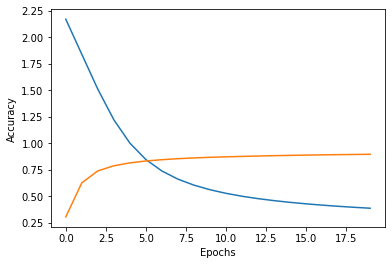

In [ ]:
losses =history['loss']
accuracy =history ['accuracy']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracy)

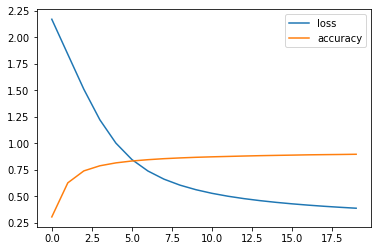

In [ ]:
fig, ax = plt.subplots()
losses =history['loss']
accuracy =history ['accuracy']
line_up, = ax.plot(losses, label='loss')
line_down, = ax.plot(accuracy, label='accuracy')
ax.legend(handles=[line_up, line_down])

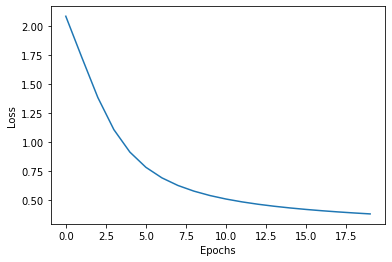

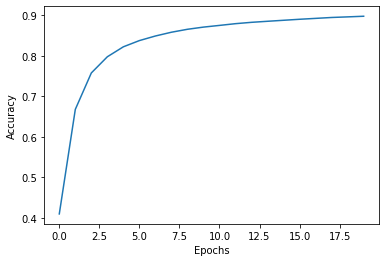

In [ ]:
losses =history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.figure()# جهت نمایش نمودارها به صورت مجزا
accuracy =history ['accuracy']
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracy)

# حالبهتر می باشد تمام دستورات نمایش را در یک تابع قرار دهیم تا در هرجایی که دلمان خواست استفاده کنیم

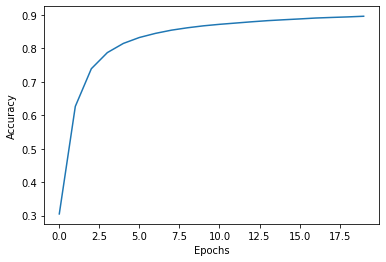

<Figure size 432x288 with 0 Axes>

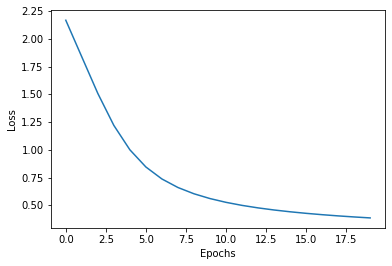

In [ ]:
plot_history2(nertwork_history)# فراخوانی تابع ایجاد شده و لیجنت در کولب اجرا نمی شود 

In [ ]:
def plot_history2(net_history):
  history = net_history.history# برای ساخت دیکشنری
  #********************

  #*****************
  fig, ax = plt.subplots()
  accuracy =history ['accuracy']
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  line_up, = ax.plot(accuracy, label='accuracy')
  if len(history.keys()) > 2 :
    accuracy_val =history ['val_accuracy']
    line_down, = ax.plot(accuracy_val, label='accuracy_val')
    ax.legend(handles=[line_up, line_down])
  plt.figure()
  
  fig, ax = plt.subplots()
  losses =history['loss']
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  line_up, = ax.plot(losses , label='loss')
  if len(history.keys()) > 2 :
    losses_val =history['val_loss']
    line_down, = ax.plot(losses_val, label='losses_val')
    ax.legend(handles=[line_up, line_down])

می توان داده ترین را به ولیدیشن نیز تقسیم کنیم و دقت را ارزایبی کنیم و بعد 
 پارامترها را انقدر تغییر بدینم تا بهرتین اموزش را داشته باشد مدل ساخته شده 
 این کار را در ابتدا می توان انجام داد در هنگام فیت کردن مدل به شکل زیر 

In [ ]:
# Train our modle with valadation data
nertwork_history2 = myModle.fit(X_train,Y_train,batch_size=128, epochs=20,validation_split=0.2)#validation_data اگر و=داده ولیشن را داشته باشیم بادی اسن دستور را بزنیم 

Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 2.1928 - accuracy: 0.2387 - val_loss: 2.0489 - val_accuracy: 0.4732
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 1.9121 - accuracy: 0.5769 - val_loss: 1.7581 - val_accuracy: 0.6754
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 1.6232 - accuracy: 0.6979 - val_loss: 1.4630 - val_accuracy: 0.7575
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 1.3513 - accuracy: 0.7565 - val_loss: 1.2078 - val_accuracy: 0.7959
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 1.1332 - accuracy: 0.7880 - val_loss: 1.0140 - val_accuracy: 0.8188
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.9707 - accuracy: 0.8092 - val_loss: 0.8720 - val_accuracy: 0.8352
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.8511 - accuracy: 0.8231 - val_loss: 0.7671 - val_accuracy: 0.8472
Epoch 

In [ ]:
print(nertwork_history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


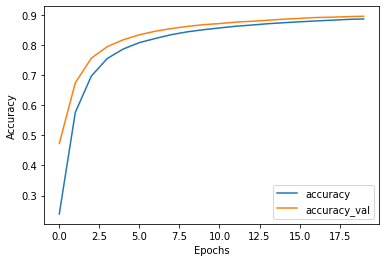

<Figure size 432x288 with 0 Axes>

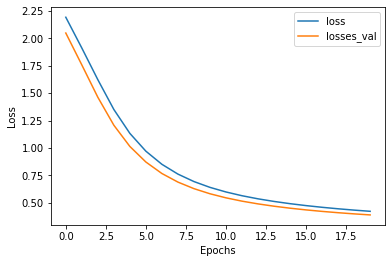

In [ ]:
plot_history2(nertwork_history2)# فراخوانی تابع ایجاد شده

تحلیل:
رنگ آبی لاس و رنگ سبز ول لاس
هر دو نمودار باهم دارد کم می شود یعنی آموزش به خوبی پیش رفته و می توان تعداد تکرار اموزش همان اپوک ها را افزایش داد تا و اگر نمودار لاس شروع کرد به کاهش در حالی که نمودار ول لاس شروع کرد به افزایش یعنی احتمالا دچار اور فیت شده اید یعنی تا اونجا باید اپک ها را قطع بکنبم با از تکنیک های استفاده ببیریم که اورفیت را رفع کندبع عنوان مثال می توانید از یک لایه دراپ اوت استفاده کنیم  دراپ اوت نورون ها را کم می کند و پون وقتی داده ها کم باشد احتمال اورفیت زیاد می باشد لذا می تواندموثر باشد البته با ایجاد لایه دراپ اوت خطا یک نقدار فازایش می یابد ولی جهت جلوگیری از اورفیتینگ ارزش دارد
   .

In [ ]:
from keras.layers import Dense,Dropout

## در مثال فوق، می‌توان دراپ اوت را پس از اولین لایه خروجی و پس از دومین لایه پنهان انجام داد. استفاده از نرخ ۰.۱ به این معنا است که ٪۱ از سلول‌های عصبی در هر تکرار غیر فعال خواهند شد. پیشنهاد می‌شود کار با نرخ ۰.۱ انجام پذیرد. اگرچه، نباید هرگز بیش از ۰.۴ شود، زیرا مدل دچار کم‌برازش اندر فیتینگ  می‌شود.

In [ ]:
#ساخت مدل
myModle2= Sequential()
myModle2.add(Dense(500,activation='relu',input_shape=(784,)))#train_images.shape[2]=784
myModle2.add(Dropout(0.2))# فقط تنها نیاز به یک درصد دارد یعنی نورن ها و وزن های ما با چه درصدی حذف بشوند در هر اپوک مثلا 0.2 بئهیم یعنی در هر تکرار 20 درصد نورن ها خاموش می شوند
#from keras.activations import relu
myModle2.add(Dense(100,activation='relu'))#(Dense(100,activation=relu))اگر دستور بالا اجرا می شد دیگری نیازی به کوتیشن نبود
myModle2.add(Dropout(0.2))
myModle2.add(Dense(10,activation='softmax'))# معمولا در خروجی از تابع سافت مکس استفاده می کنند 
myModle2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
myModle2.compile(optimizer=SGD(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Train our modle with valadation data
nertwork_history3 = myModle2.fit(X_train,Y_train,batch_size=128, epochs=20,validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 2.2197 - accuracy: 0.1757 - val_loss: 2.0366 - val_accuracy: 0.4169
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 1.9537 - accuracy: 0.3860 - val_loss: 1.7622 - val_accuracy: 0.6338
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 1.7087 - accuracy: 0.5356 - val_loss: 1.5018 - val_accuracy: 0.7293
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 1.4861 - accuracy: 0.6234 - val_loss: 1.2740 - val_accuracy: 0.7705
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 1.2989 - accuracy: 0.6736 - val_loss: 1.0885 - val_accuracy: 0.8002
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 1.1494 - accuracy: 0.7042 - val_loss: 0.9451 - val_accuracy: 0.8180
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 1.0334 - accuracy: 0.7273 - val_loss: 0.8365 - val_accuracy: 0.8308
Epoch 

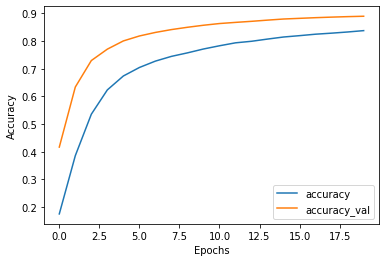

<Figure size 432x288 with 0 Axes>

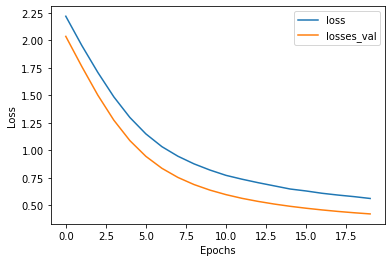

In [ ]:
plot_history2(nertwork_history3)# فراخوانی تابع ایجاد شده و لیجنت در کولب اجرا نمی شود 

## Evaluation ==================================================================

In [ ]:
test_loss, test_acc =myModle2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.8899


In [ ]:
test_lable_p = myModle2.predict(X_test)# خروجی 10*1000 هست که بیشترین عدد اعشاری به عنوان کلاس استفاده می شود و حال برای تبدیل کردن لیبل به یک عدد از کتابخانه نامپای استفاده می کنیم

In [ ]:
import numpy as np 
test_lable_p = np.argmax(test_lable_p , axis=1,)# اکسیس را مساوی با یک قرار می دهیم یعنی فقط اندیکیس (مکان) ماکسیمم مقدار در هر ردیف افقی را بگیر 
test_lable_p

array([7, 2, 1, ..., 4, 5, 6])

# حال می توانیم مقایسه کنیم با تست لیبل که از قبل بدست آوردیم

In [ ]:
print(test_labels)
print(test_lable_p)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
difrent=[]
for i in range(0,test_labels.shape[0]):
  if test_labels[i] != test_lable_p[i] :
    difrent.append(1)
print('of 10000:',len(difrent))

of 10000: 1101


In [ ]:
test_labels[5]

1

## Change layers parametrs

In [ ]:
myModle.summary()# اطلاعات کامل
print(myModle.layers[0]._name)# نام لایه اول را استخراج می کنیم 
myModle.layers[0]._name = 'layer_0'
print(myModle.layers[0].name)# نام لایه اول را استخراج می کنیم 
myModle.summary()# اطلاعات کامل

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________
dense
layer_0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 500)               392500    
                                                                 
 dense_1 (Dense)

In [ ]:
# غیر فعال کردن یک لایه از مدل
myModle.layers[0].trainable


True


In [ ]:
myModle.layers[0].trainable = False
print(myModle.layers[0].trainable,'\n','***************************','\n')
myModle.summary()

False 
 *************************** 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 51,110
Non-trainable params: 392,500
_________________________________________________________________


In [ ]:
# مشاهده تمامی پارمترهای یک لایه
myModle.layers[0].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'batch_input_shape': (None, 784),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'layer_0',
 'trainable': False,
 'units': 500,
 'use_bias': True}